## Different Clustering Methods, Elbow and Silhouette Coefficient + Some Other Clustering Metrics

In this project, we will work with some clustering methods (K-means, DBSCAN, OPTICS). 

Leveraging Scikit-learn and the MNIST dataset, we will investigate the use of clustering for computer vision.

In this project, we will learn how to:

    Preprocess images for clustering
    Deploy different clustering algorithms
    Use common metrics to evaluate cluster performance and number of clusters

Let's get started by importing a few of the libraries we will use in this project.

In [1]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from timeit import default_timer as timer
from datetime import timedelta

### 1. Import the MNIST dataset

For this project, we will be using the MNIST dataset. It is available through keras, a deep learning library. Although we won't be using other features of keras today, it will save us time to import mnist from this library. It is also available through the tensorflow library or for download at http://yann.lecun.com/exdb/mnist/.

In [ ]:
!pip install -U keras

In [ ]:
!pip install -U tensorflow

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# MNIST training dataset: 60000 images that are 28 by 28 pixels
print('Training Data: {}'.format(X_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [3]:
# MNIST testing dataset: 10000 images that are 28 by 28 pixels
print('Testing Data: {}'.format(X_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


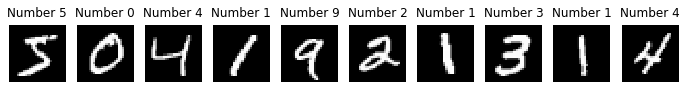

In [4]:
# create figure with 10x1 subplots using matplotlib.pyplot
fig, axs = plt.subplots(1, 10, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(X_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))

### 2. Preprocessing the MNIST images

Images stored as NumPy arrays are 2-dimensional arrays. However, the K-means clustering algorithm provided by scikit-learn ingests 1-dimensional arrays; as a result, we will need to reshape each image.

Clustering algorithms almost always use 1-dimensional data. For example, if you were clustering a set of X, Y coordinates, each point would be passed to the clustering algorithm as a 1-dimensional array with a length of two (example: [2,4] or [-1, 4]). If you were using 3-dimensional data, the array would have a length of 3 (example: [2, 4, 1] or [-1, 4, 5]).

MNIST contains images that are 28 by 28 pixels; as a result, they will have a length of 784 once we reshape them into a 1-dimensional array.

In [5]:
# preprocessing the images

# convert each image to 1 dimensional array
X = X_train.reshape(len(X_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

# MNIST reshape training dataset: 60000 images that are 784 pixels
print(X.shape)

(60000, 784)


### 3. K-Means Clustering

Time to start clustering!

The MNIST dataset contains images of the integers 0 to 9. Because of this, let's start by setting the number of clusters to 10, one for each digit.

In [6]:
n_digits = len(np.unique(Y))
print(n_digits)

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_digits, 
            init='random', 
            n_init=10,
            max_iter=300, 
            tol=1e-04,
            random_state=1)

10


In [7]:
# n_clusters -> we set the number of desired clusters to 10;
# init -> 'random' to run the k-means clustering algorithms with different random centroids;
# n_init=10 to run the k-means clustering algorithms 10 times independently
#           to choose the final model as the one with the lowest SSE;
# max_iter -> specify the maximum number of iterations for each single run;
# tol -> controls the tolerance with regard to the changes in the SSE to declare convergence. 
#        In the preceding code, we chose a tolerance of 1e-04 (=0.0001);
# random_state -> pass an int for reproducible output across multiple function calls.

In [8]:
start = timer()

# Fit the model to the training data
y_kmeans = kmeans.fit_predict(X)

end = timer()
print(timedelta(seconds=end-start))

0:00:57.364578


Oh, it's a very long time! Let`s try another type of K-means.

The **MiniBatchKMeans** is a variant of the **KMeans** algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. Mini-batches are subsets of the input data, randomly sampled in each training iteration. These mini-batches drastically reduce the amount of computation required to converge to a local solution. In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.

The algorithm iterates between two major steps, similar to vanilla k-means. In the first step, samples are drawn randomly from the dataset, to form a mini-batch. These are then assigned to the nearest centroid. In the second step, the centroids are updated. In contrast to k-means, this is done on a per-sample basis. For each sample in the mini-batch, the assigned centroid is updated by taking the streaming average of the sample and all previous samples assigned to that centroid. This has the effect of decreasing the rate of change for a centroid over time. These steps are performed until convergence or a predetermined number of iterations is reached.

**MiniBatchKMeans converges faster than KMeans**, but the quality of the results is reduced. In practice this difference in quality can be quite small, as shown in the figure below (see https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans):

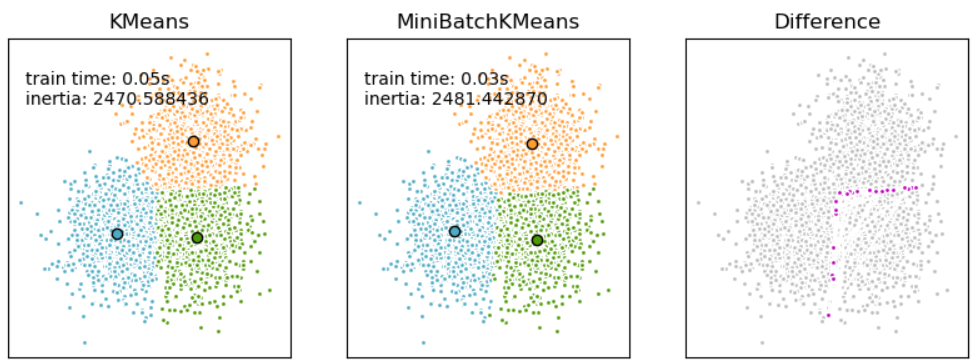

<span style="color:red">Initialize MiniBatchKMeans model with parameters as for KMeans model</span>

But change init='random' to init='k-means++'.

Why is this done?

In [9]:
# you code here
#kmeans_batch = 
#pass

# Initialize MiniBatchKMeans model
kmeans_batch = MiniBatchKMeans(n_clusters=10, 
            init='k-means++', 
            n_init=10,
            max_iter=300, 
            tol=1e-04,
            random_state=1)

### Drawback of standard K-means algorithm
(from [ML | K-means++ Algorithm](https://www.geeksforgeeks.org/ml-k-means-algorithm/))

One disadvantage of the K-means algorithm is that it is sensitive to the initialization of the centroids or the mean points. So, if a centroid is initialized to be a “far-off” point, it might just end up with no points associated with it, and at the same time, more than one cluster might end up linked with a single centroid. Similarly, more than one centroids might be initialized into the same cluster resulting in poor clustering. For example, consider the images shown below.
A poor initialization of centroids resulted in poor clustering.

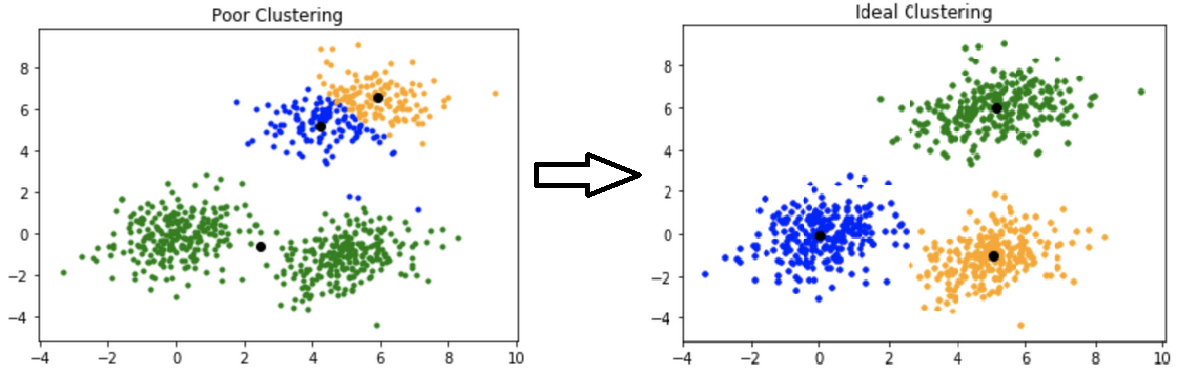

To overcome the above-mentioned drawback we use **K-means++**. This algorithm ensures a smarter initialization of the centroids and improves the quality of the clustering. Apart from initialization, the rest of the algorithm is the same as the standard K-means algorithm. That is K-means++ is the standard K-means algorithm coupled with a smarter initialization of the centroids.

**Initialization algorithm:**

The steps involved are:


        1. Randomly select the first centroid from the data points.
        2. For each data point compute its distance from the nearest, previously chosen centroid.
        3. Select the next centroid from the data points such that the probability of choosing a point as centroid is directly proportional to its distance from the nearest, previously chosen centroid. (i.e. the point having maximum distance from the nearest centroid is most likely to be selected next as a centroid)
        4. Repeat steps 2 and 3 untill k centroids have been sampled

**Intuition:**

By following the above procedure for initialization, we pick up centroids that are far away from one another. This increases the chances of initially picking up centroids that lie in different clusters. Also, since centroids are picked up from the data points, each centroid has some data points associated with it at the end.

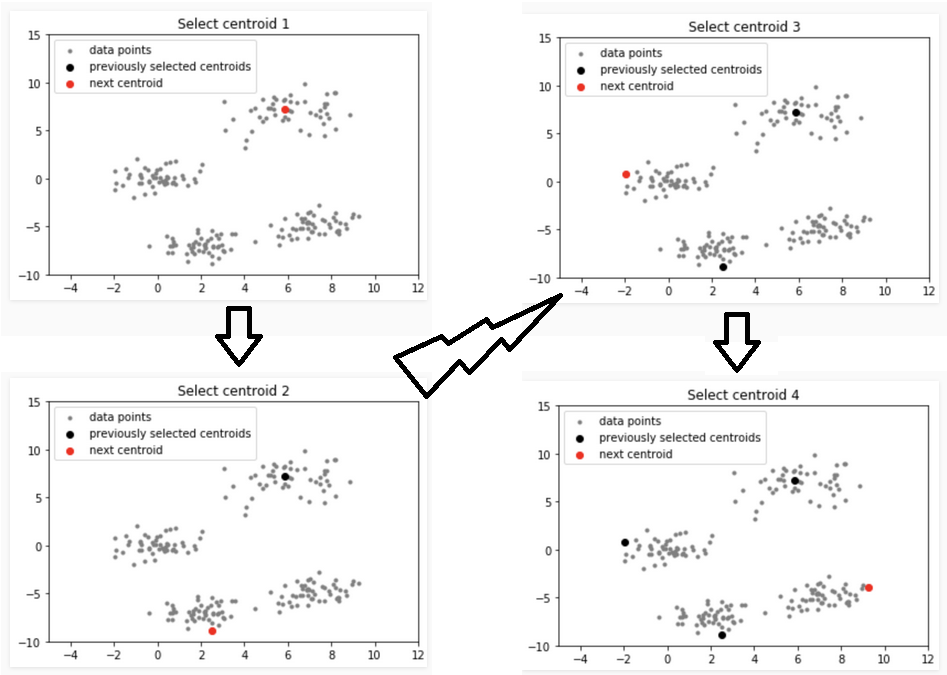

**Note:** Although the initialization in K-means++ is computationally more expensive than the standard K-means algorithm, the run-time for convergence to optimum is drastically reduced for K-means++. This is because the centroids that are initially chosen are likely to lie in different clusters already.

In [10]:
start = timer()

# Fit the model to the training data
y_kmeans_batch = kmeans_batch.fit_predict(X)

end = timer()
print(timedelta(seconds=end-start))

0:00:03.816917


Well! Due to the size of the MNIST dataset, we will use the **mini-batch implementation of k-means clustering** provided by scikit-learn and **kmeans++ initialiization**. This will dramatically reduce the amount of time it takes to fit the algorithm to the data.

### № 4. Choosing the Appropriate Number of Clusters

In this section, you’ll look at two methods that are commonly used to evaluate the appropriate number of clusters:

The elbow method
The silhouette coefficient

These are often used as complementary evaluation techniques rather than one being preferred over the other.

To perform the elbow method, run several k-means (or another method), increment k with each iteration, and record an objective function, or, **the sum of squared error (SSE)**:

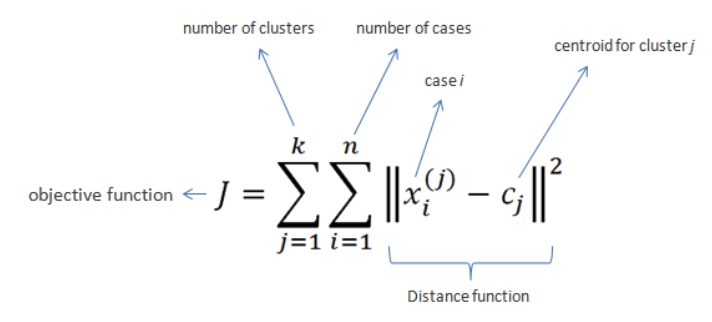

When you plot SSE as a function of the number of clusters, notice that SSE continues to decrease as you increase k. As more centroids are added, the distance from each point to its closest centroid will decrease.

There’s a sweet spot where the SSE curve starts to bend known as the elbow point.

The x-value of this point is thought to be a reasonable trade-off between error and number of clusters.

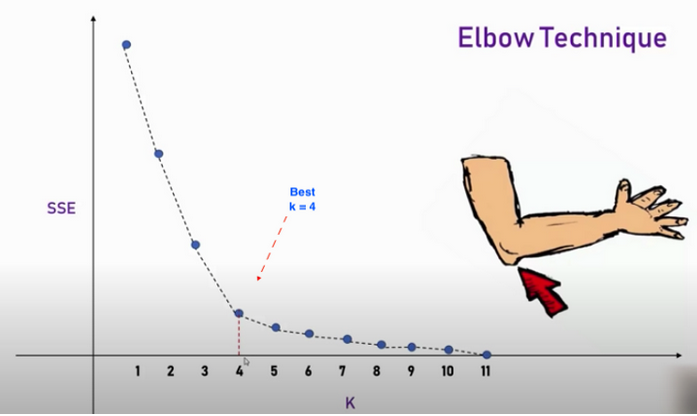

In [11]:
# A list holds the SSE values for each n
plot_n_clusters = 20
sse = []
for k in range(1, plot_n_clusters+1):
        # Initialize MiniBatchKMeans model with previous code
        # you code here
        #kmeans_batch = 
        #pass
        kmeans_batch = MiniBatchKMeans(n_clusters=k, 
                 init='k-means++', 
                 n_init=10, 
                 max_iter=300, 
                 random_state=1)
        
        kmeans_batch.fit(X)
        sse.append(kmeans_batch.inertia_)

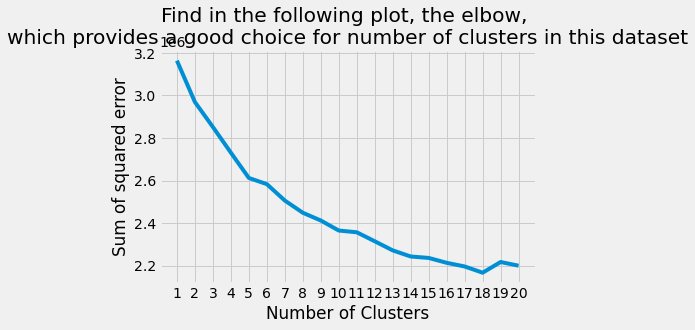

In [12]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, plot_n_clusters+1), sse)
plt.xticks(range(1, plot_n_clusters+1))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of squared error")
plt.title('Find in the following plot, the elbow, \nwhich provides a good choice for number of clusters in this dataset')
plt.show()

Determining the elbow point in the SSE curve isn’t always straightforward. If you’re having trouble choosing the elbow point of the curve, then you could use a Python package, kneed, to identify the elbow point programmatically:

In [ ]:
!pip install -U kneed

In [13]:
from kneed import KneeLocator
kl = KneeLocator(
range(1, plot_n_clusters+1), sse, curve="convex", direction="decreasing")
kl.elbow

8

The choice of this number of clusters does not look very convincing.
Let's try another methods.

The **silhouette coefficient** is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

    How close the data point is to other points in the cluster
    How far away the data point is from points in other clusters

Silhouette coefficient values range between -1 and 1: 

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

**Silhouette Score = (b-a)/max(a,b)**

where

a= average intra-cluster distance i.e the average distance between each point within a cluster;

b= average inter-cluster distance i.e the average distance between all clusters.

Loop through values of k again. This time, instead of computing Sum of squared error (SSE), compute the silhouette coefficient:

<span style="color:red">Don't start this code now, since it takes a long time to execute.</span>

In [ ]:
from sklearn.metrics import silhouette_score

start = timer()

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, plot_n_clusters+1):
        kmeans = MiniBatchKMeans(n_clusters=k, 
                 init='k-means++', 
                 n_init=10, 
                 max_iter=300, 
                 random_state=1)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_coefficients.append(score)
        
end = timer()
print(timedelta(seconds=end-start))

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, plot_n_clusters+1), silhouette_coefficients)
plt.xticks(range(2, plot_n_clusters+1))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

<span style="color:red">On my laptop it took about 6 hours and 15 minutes!</span>

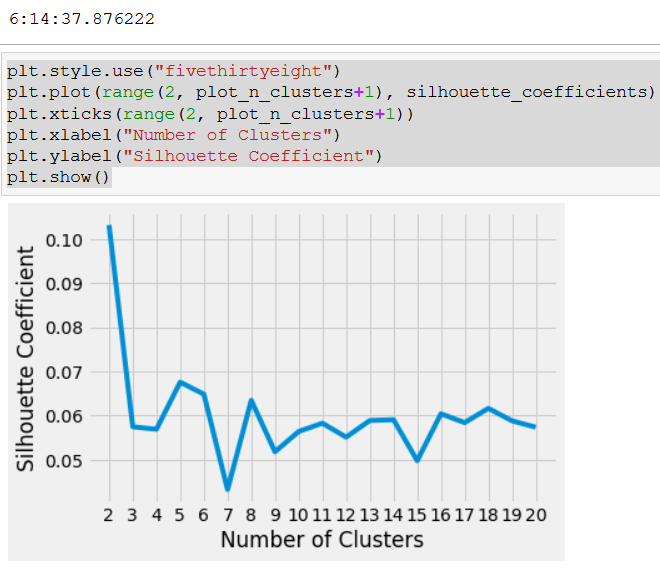

We have some candidates for number of clusters: 2, 5, 6, 8, 11, ... .

The choice of these numbers of clusters does not look very convincing.

Let's see which clusters have been allocated.

To do this, we visualize the corresponding centroids, provided that we have selected 20 (='plot_n_clusters') clusters

### 5. Visualizing Cluster Centroids

The most representative point within each cluster is called the centroid. If we were dealing with X,Y points, the centroid would simply be a point on the graph. However, since we are using arrays of length 784, our centroid is also going to be an array of length 784. We can reshape this array back into a 28 by 28 pixel image and plot it.

These graphs will display the most representative image for each cluster.

In [14]:
# record centroid values
centroids = kmeans_batch.cluster_centers_

# reshape centroids into images
images = centroids.reshape(plot_n_clusters, 28, 28)
images *= 255
images = images.astype(np.uint8)

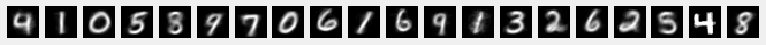

In [15]:
# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(1, plot_n_clusters, figsize = (12, 12))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):  
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')

### 6. Optimizing and Evaluating the Clustering Algorithm

Earlier we made the assumption that K = 10 was the appropriate number of clusters; however, this might not be the case now. 

Let's fit the K-means clustering algorithm with several different values of K, than evaluate the performance using some intrinsic metrics.

**Davies-Bouldin Index**

If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

**Calinski-Harabasz Index**

If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).

In [16]:
def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Davies-Bouldin Index: {}'.format(metrics.davies_bouldin_score(X, labels)))
    print('Calinski-Harabasz Index: {}'.format(metrics.calinski_harabasz_score(X, labels)))

In [17]:
clusters = [10, 20, 30, 40, 50]

# test different numbers of clusters
for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # print cluster metrics
    labels = estimator.labels_
    calculate_metrics(estimator, X, labels)

Number of Clusters: 10
Davies-Bouldin Index: 3.1101164483471035
Calinski-Harabasz Index: 2138.0883750185612
Number of Clusters: 20
Davies-Bouldin Index: 2.893623556999449
Calinski-Harabasz Index: 1522.831014945516
Number of Clusters: 30
Davies-Bouldin Index: 2.8383547138725693
Calinski-Harabasz Index: 1187.3177058895426
Number of Clusters: 40
Davies-Bouldin Index: 2.9017928612330506
Calinski-Harabasz Index: 976.3678948548668
Number of Clusters: 50
Davies-Bouldin Index: 2.92907261885217
Calinski-Harabasz Index: 784.684310495887


What do you think about these indices? Can you explain the results obtained?

### 7. Density Based Spatial Clustering of Applications with Noise (DBCSAN)

It`s a clustering algorithm which was proposed in 1996. In 2014, the algorithm was awarded the ‘Test of Time’ award at the leading Data Mining conference, KDD. 

**Why DBSCAN?**
Partitioning methods (like K-means) and hierarchical clustering work for finding spherical-shaped clusters or convex clusters. In other words, they are suitable only for compact and well-separated clusters. Moreover, they are also severely affected by the presence of noise and outliers in the data.

Real life data may contain irregularities, like –

i) Clusters can have different shapes.

ii) Data may contain noise.

Clusters are dense regions in the data space, separated by regions of the lower density of points. **The DBSCAN algorithm** is based on this intuitive notion of “clusters” and “noise”. 

The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

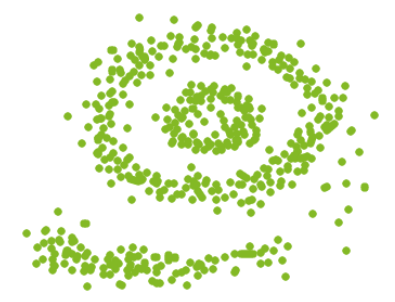

**DBSCAN algorithm requires two parameters –**

**eps**: It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered as neighbors. If the eps value is chosen too small then large part of the data will be considered as outliers. If it is chosen very large then the clusters will merge and majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.
    
**MinPts**: Minimum number of neighbors (data points) within eps radius. Larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.
    
**In this algorithm, we have 3 types of data points.**

**Core Point**: A point is a core point if it has more than MinPts points within eps.

**Border Point**: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.

**Noise** or **outlier**: A point which is not a core point or border point.

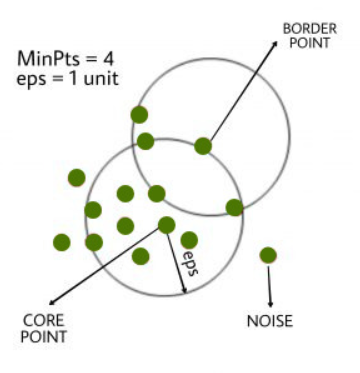

**DBSCAN algorithm can be abstracted in the following steps –**

1. Find all the neighbor points within eps and identify the core points or visited with more than MinPts neighbors.

2. For each core point if it is not already assigned to a cluster, create a new cluster.

3. Find recursively all its density connected points and assign them to the same cluster as the core point.

4. A point a and b are said to be density connected if there exist a point c which has a sufficient number of points in its neighbors and both the points a and b are within the eps distance. This is a chaining process. So, if b is neighbor of c, c is neighbor of d, d is neighbor of e, which in turn is neighbor of a implies that b is neighbor of a.

5. Iterate through the remaining unvisited points in the dataset. Those points that do not belong to any cluster are noise.

### 8. OPTICS Clustering

The original OPTICS algorithm is designed to improve on DBSCAN by taking into account the variable density of the data. OPTICS computes a dendogram based on the reachability of points. The clusters have to be extracted from the reachability.

### 9. Comparing different clustering algorithms on toy datasets

This example shows characteristics of different clustering algorithms on datasets that are “interesting” but still in 2D. With the exception of the last dataset, the parameters of each of these dataset-algorithm pairs has been tuned to produce good clustering results. Some algorithms are more sensitive to parameter values than others.

The last dataset is an example of a ‘null’ situation for clustering: the data is homogeneous, and there is no good clustering. For this example, the null dataset uses the same parameters as the dataset in the row above it, which represents a mismatch in the parameter values and the data structure.

While these examples give some intuition about the algorithms, this intuition might not apply to very high dimensional data.

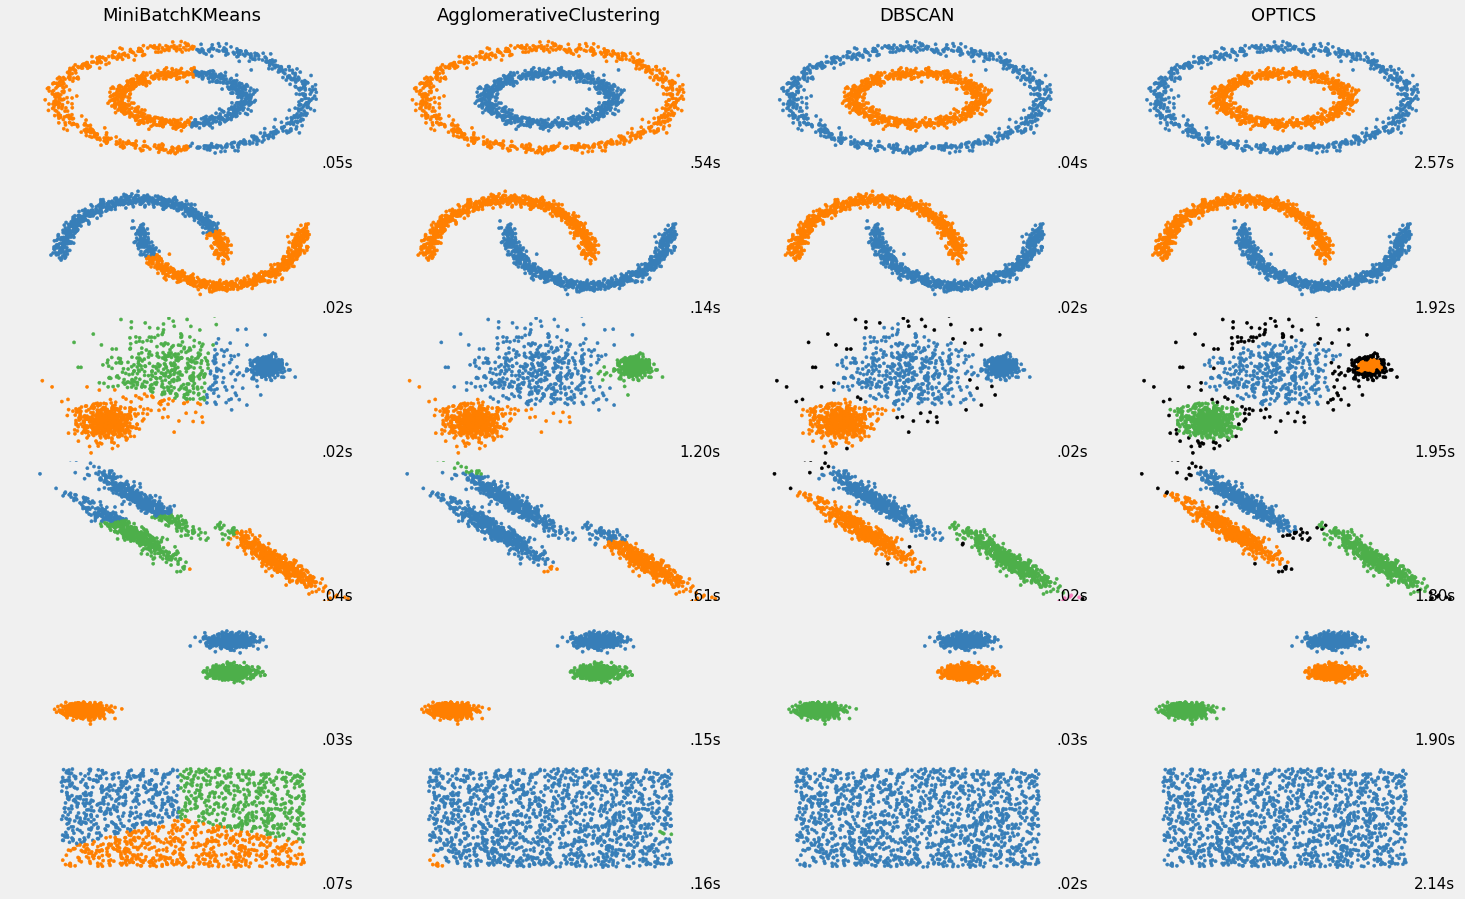

In [18]:
import time
import warnings

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
#        ('AffinityPropagation', affinity_propagation),
#        ('MeanShift', ms),
#        ('SpectralClustering', spectral),
#        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
#        ('Birch', birch),
#        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()